In [1]:
# Library Imports 

import pandas as pd # for dataframe 
import seaborn as sns # for seaborn visualizattion
import matplotlib.pyplot as plt # for matplot visualization
import numpy as np # for numerical computing

**Feature set description**

|**Feature**         |**Description**|
|----------------|:----------------|
|Date Time       | year-month-day hour:minute:second   |
|Appliances      | energy use in Wh|
|lights          | energy use of light fixtures in the house in Wh|
|T1              | Temperature in kitchen area, in Celsius|
|RH_1            | Temperature in kitchen area, in Celsius|
|T2              | Temperature in living room area, in Celsius
|RH_2            | Humidity in living room area, in %
|T3              | Temperature in laundry room area
|RH_3            | Humidity in laundry room area, in %
|T4              | Temperature in office room, in Celsius
|RH_4            | Humidity in office room, in %
|T5              | Temperature in bathroom, in Celsius
|RH_5            | Humidity in bathroom, in %
|T6              | Temperature outside the building (north side), in Celsius
|RH_6            | Humidity outside the building (north side), in %
|T7              | Temperature in ironing room , in Celsius
|RH_7            | Humidity in ironing room, in %
|T8              | Temperature in teenager room 2, in Celsius
|RH_8            | Humidity in teenager room 2, in %
|T9              | Temperature in parents room, in Celsius
|RH_9            | Humidity in parents room, in %
|To              | Temperature outside (from Chievres weather station), in Celsius
|Pressure (from Chievres weather station) | in mm Hg
|RH_out Humidity outside (from Chievres weather station) | in %
|Wind speed (from Chievres weather station) | in m/s
|Visibility (from Chievres weather station) | in km
|Tdewpoint (from Chievres weather station) | Â°C
|rv1 | Random variable 1 nondimensional
|rv2 | Random variable 2 nondimensional


In [2]:
file_path = 'energydata_complete.csv'

# Read our dataset into our dataframe
df = pd.read_csv(file_path)

# Print the head of the dataframe
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Check for missing values in the features
df.isna().sum()


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Per our output, we see not missing values in the dataset. 

In [4]:
# Conver date to Datetime format
df['Datetime'] = pd.to_datetime(df['date'])

In [5]:
# Verify our dataframe types 
df.dtypes

date                   object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
Datetime       datetime64[ns]
dtype: object

In [6]:
# Round all values to 2 decimal places for easier processing and formatting
df = df.round(2)

In [7]:
# Validate our rounding
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Datetime
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,2016-01-11 17:40:00


In [8]:
# Drop the 'Date' column
df = df.drop(columns=['date'])

# Move the 'Datetime' column to the first position
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

In [9]:
df.head()

,Datetime,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08


In [10]:
correlation_matrix = df.corr()

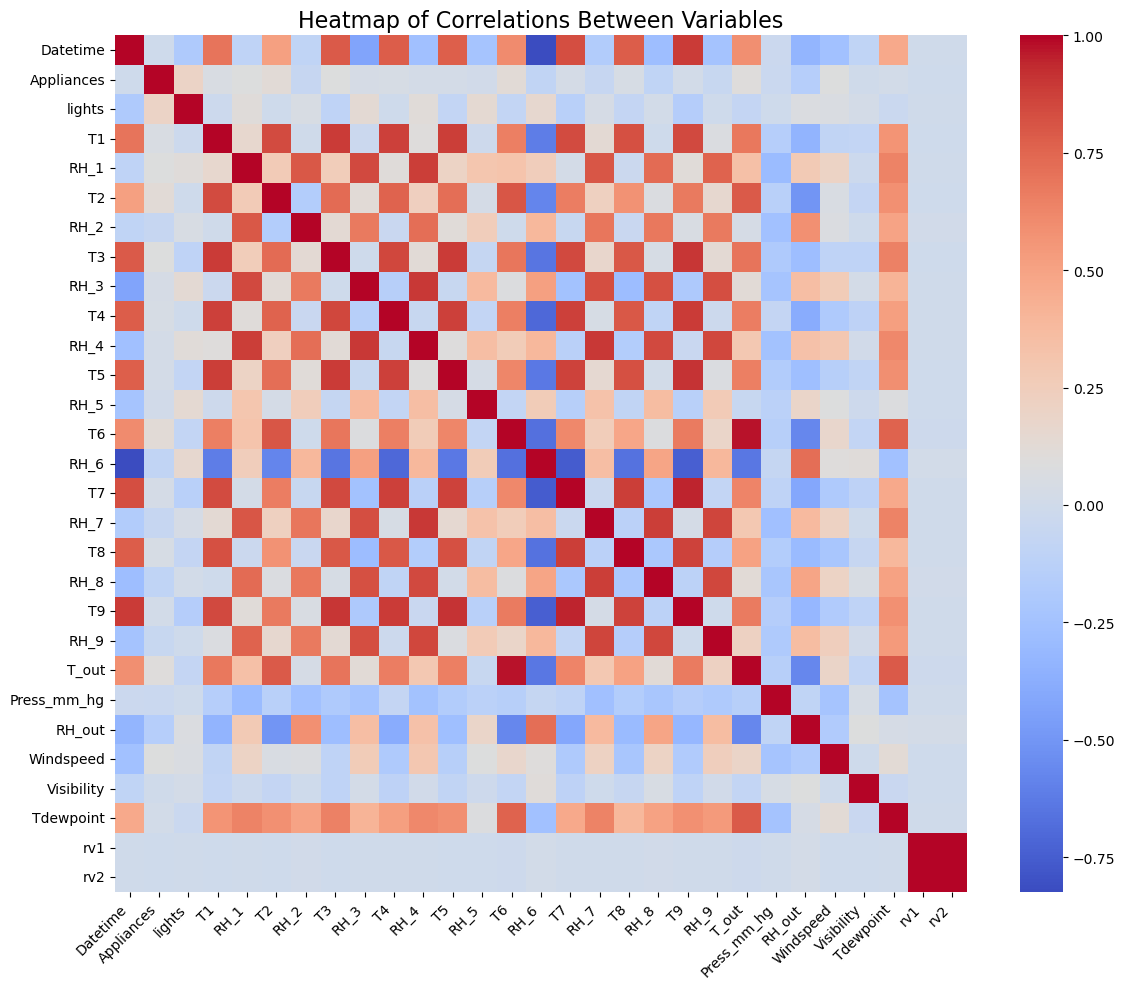

In [11]:
# Set up the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)

# Add titles and labels
plt.title('Heatmap of Correlations Between Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

From our heatmap correlation, we can see the following features as the most prominent: 

|**Feature**         |**Description**|
|----------------|:----------------|
|lights                    | Directly affects energyh consumption  |
|T1 (Kitchen Temp)         | Strong correlation with Appliances    |
|T2 (Living Room Temp)     | Represents HVAC energy use            |
|T_out (Outside Temp)      | External factor on energy consumption |
|RH_out (Outdoor Humidity) | Impcasts cooling and heating          | 
|Windspeed                 | Influences temp reulation             | 
|Tdewpoint                 | Outdoor conditions                    | 
|hour                      | Captures time-based energy patterns   | 

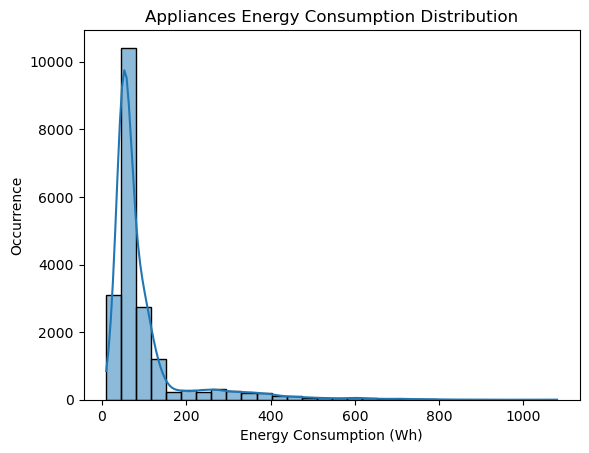

In [12]:
# Plot a distribution of the energy consumption
sns.histplot(df['Appliances'], bins=30, kde=True)
plt.title("Appliances Energy Consumption Distribution")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Occurrence")
plt.show()


1. We can see from our distribution plot for energy consumption that most of the consumption is < 200 Wh
2. A sharp peak > 50 Wh < 100 Wh suggests many appliances consume low energy. 
3. We have a right skewed plot, dmeonstrating that anything > 400 Wh is rare. 

In [13]:
# Extract time-based features
df['hour'] = df['Datetime'].dt.hour  # Extract hour of the day (0-23)


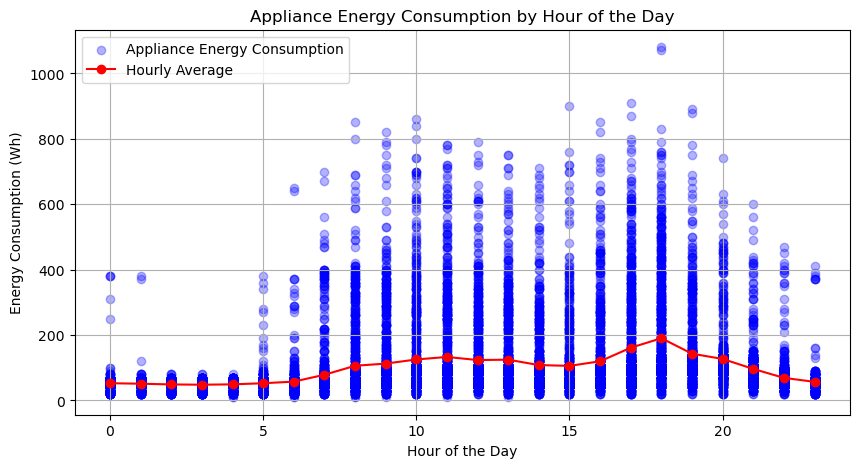

In [14]:
# Plot raw data (individual appliance consumption points)
plt.figure(figsize=(10, 5))
plt.scatter(df['hour'], df['Appliances'], alpha=0.3, color='blue', label="Appliance Energy Consumption")

# Overlay the 24-hour average trend
hourly_avg = df.groupby('hour')['Appliances'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='red', label="Hourly Average")

# Plot our hourly average across the dataset
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliance Energy Consumption by Hour of the Day")
plt.legend()
plt.grid()
plt.show()

The hourly average did not provide to strong of an insight. As expected, energy consumption is lowest during sleeping hours. <br>
Early evening has the peak on average. 